# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/home/carnd/CarND-LeNet-Lab/train.p'
validation_file= '/home/carnd/CarND-LeNet-Lab/valid.p'
testing_file = '/home/carnd/CarND-LeNet-Lab/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(x_train)

# TODO: Number of testing examples.
n_test = len(x_test)

# TODO: Number of validation examples.
n_valid = len(x_valid)

# TODO: What's the shape of an traffic sign image?
image_shape = x_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(list(y_train)))
              
print("Number of training examples =", n_train)                
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
                

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
# Check shape and type 
print(x_test.shape)
print(x_test.dtype)

print(y_test.shape)
print(y_test.dtype)

(12630, 32, 32, 3)
uint8
(12630,)
uint8


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

10


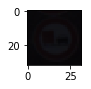

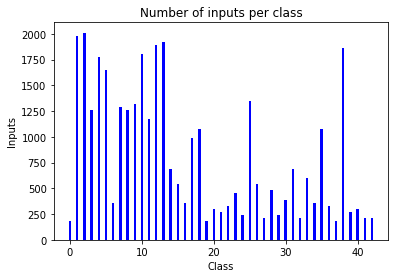

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.ndimage
# Visualizations will be shown in the notebook.
%matplotlib inline

# Visualize one image
index = random.randint(0, len(x_train))
image = x_train[index].squeeze()


plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

# Plot the labels
# train_features = np.array(x_train)
train_labels = np.array(y_train)
inputs_per_class = np.bincount(train_labels)


mpl_figure = plt.figure()
ax = mpl_figure.add_subplot(111)
ax.set_ylabel('Inputs')
ax.set_xlabel('Class')
ax.set_title('Number of inputs per class')
ax.bar(range(len(inputs_per_class)), inputs_per_class, 1/3, color='blue', label='Inputs per class')
plt.show()




----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import cv2
import tensorflow as tf

# Grayscale the image
def grayscale(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # this is taking a long time, decided to not use
    # img_gray = tf.image.rgb_to_grayscale(img, name='gray')
    return img_gray

# Normalizes the data between 0.1 and 0.9 instead of 0 to 255    
def normalize(data):
    return data / 255 * 0.8 + 0.1

# Iterates through grayscale and return
def preprocess(data):
    gray_images = []
    for image in data:
        gray = grayscale(image)
        gray_images.append(gray)
        
    return np.array(gray_images)


In [6]:
from numpy import newaxis

print('Start preprocessing training data.')

# Iterate through grayscale, newaxis to add the additional depth
x_train = preprocess(x_train)
x_train = x_train[..., newaxis]


# Normalize the  data
x_train = normalize(x_train) 

print('Finished preprocessing training data.')

# Check training data shape
image_shape_train = x_train.shape
print("Processed training data shape =", image_shape_train)


print('Preprocessing test data...')

# Iterate through grayscale, newaxis to add the additional depth
x_test = preprocess(x_test)
x_test = x_test[..., newaxis]

# Normalize
x_test = normalize(x_test) 

print('Finished preprocessing testing data.')

# Double-check test data
image_shape_test = x_test.shape
print("Processed testing data shape =", image_shape_test)



print('Preprocessing validation data...')

# Iterate through grayscale, newaxis to add the additional depth
x_valid = preprocess(x_valid)
x_valid = x_valid[..., newaxis]

# Normalize
x_valid = normalize(x_valid) 

print('Finished preprocessing validation data.')

# Double-check validation data
image_shape_valid = x_valid.shape
print("Processed validation data shape =", image_shape_valid)

print('All data preprocessing complete.')

Start preprocessing training data.
Finished preprocessing training data.
Processed training data shape = (34799, 32, 32, 1)
Preprocessing test data...
Finished preprocessing testing data.
Processed testing data shape = (12630, 32, 32, 1)
Preprocessing validation data...
Finished preprocessing validation data.
Processed validation data shape = (4410, 32, 32, 1)
All data preprocessing complete.


In [7]:
# Check shape and type 
# changed to float 64
print(x_test.shape)
print(x_test.dtype)
print(y_test.dtype)

(12630, 32, 32, 1)
float64
uint8


In [8]:
# add this for shuffling

from sklearn.utils import shuffle

x_train, y_train = shuffle(x_train, y_train)

### Model Architecture

In [15]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
## set up tensor flow


# how many times to tell tensorflow to run training data through nwk
# the more epochs, the better model will train but will take longer
EPOCHS = 100
# how many training images to run th. the nwk at a time
# larger batch size, the faster it will train but processor may have a memory limit
BATCH_SIZE = 128


In [16]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    keep_p = tf.placeholder(tf.float32)
    
    # first conv. layer, input depth = 1, o/p depth = 6
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # o/p height = (inout height - filter +1)/vertical stride, (32-5+1)/1 = 28
    # so o/p of this layer = 28x28x6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    # activate o/p of conv. layer with Relu activation fn.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # second conv. layer starts
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    
    # SOLUTION: Flatten. Input = 5x5x16 =  Output = 400.
    fc0 = tf.contrib.layers.flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    # pass this vector to a fully connected layer with width = 120
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b    
 
    # SOLUTION: Activation. - applied to output of fully connected layer
    fc1    = tf.nn.relu(fc1)
    
    # Dropout, to prevent overfitting    
    # fc1 = tf.nn.dropout(fc1, 1.0 )

    # repeat this with layer width of 84
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
    # fc2 = tf.nn.dropout(fc2, 1.0)

    #### Here replace 10 with 43 for traffic sign classifier since this has 43 classes
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    # attach fully connected oupput layer with width = # of classed in label set = 10 classes, one for each digit
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [17]:
# Train LeNet to classify  data.
# x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

# input batches, batch size = none to accept a batch of any size
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_p = tf.placeholder(tf.float32)
# one hot encode labels
one_hot_y = tf.one_hot(y, 43)



In [18]:
# Create a training pipeline 

# learning rate - how quickly to update the network weights
rate = 0.001

# calculate logits
logits = LeNet(x)

# compare logits to one hot labels to get cross entropy, how diff the logits are from one hot encoded labels
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)

# avg. cross entropy from all training images
loss_operation = tf.reduce_mean(cross_entropy)

# minimize loss 
optimizer = tf.train.AdamOptimizer(learning_rate = rate)

# use back propogation to update nwk and minimize training loss
training_operation = optimizer.minimize(loss_operation)

In [19]:
# pipeline for evaluating the model, evaluate how good the model is

# compare logit prediction with one hot encoded ground truth label
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
# average individual prediction accuracies
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# saver = tf.train.Saver()


# takes data set as input, sets some initial variables
# batches data set and runs it through the evaluation pipeline
# average accuracy of each batch to calculate total accuracy of the model
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        # accuracy =  sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_p : 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [20]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


saver = tf.train.Saver()
# save_file = './lenet5'

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        # shuffle training data so that training is not biased by order of images
        x_train, y_train = shuffle(x_train, y_train)
        
        # train the model on each batch
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            # loss = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_p : 0.7})
        
        # evaluate the model
        validation_accuracy = evaluate(x_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    
    print("Completed")
        
    # save model to it can be loaded later
    # need to keep tuning hyper parameters to get the best results
    
    saver.save(sess, './lenet')     
    # saver.save(sess, save_file)
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.619
EPOCH 2 ...
Validation Accuracy = 0.767
EPOCH 3 ...
Validation Accuracy = 0.825
EPOCH 4 ...
Validation Accuracy = 0.857
EPOCH 5 ...
Validation Accuracy = 0.860
EPOCH 6 ...
Validation Accuracy = 0.864
EPOCH 7 ...
Validation Accuracy = 0.883
EPOCH 8 ...
Validation Accuracy = 0.873
EPOCH 9 ...
Validation Accuracy = 0.878
EPOCH 10 ...
Validation Accuracy = 0.886
EPOCH 11 ...
Validation Accuracy = 0.902
EPOCH 12 ...
Validation Accuracy = 0.902
EPOCH 13 ...
Validation Accuracy = 0.894
EPOCH 14 ...
Validation Accuracy = 0.901
EPOCH 15 ...
Validation Accuracy = 0.896
EPOCH 16 ...
Validation Accuracy = 0.901
EPOCH 17 ...
Validation Accuracy = 0.892
EPOCH 18 ...
Validation Accuracy = 0.899
EPOCH 19 ...
Validation Accuracy = 0.903
EPOCH 20 ...
Validation Accuracy = 0.906
EPOCH 21 ...
Validation Accuracy = 0.896
EPOCH 22 ...
Validation Accuracy = 0.899
EPOCH 23 ...
Validation Accuracy = 0.906
EPOCH 24 ...
Validation Accuracy = 0.916
EPOCH 25 ...

In [21]:
# Evaluate the Model on test data set
# remember to do this one time only
# Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

##### see if we need to save a file instead or if this works

# save_file = './lenet5'

with tf.Session() as sess:
     
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    # saver.restore(sess, save_file)
    test_accuracy = evaluate(x_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.917


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Original Image Shape
(32, 32)
Test Image data Shape
(1, 32, 32)
New Array Shape
(1, 32, 32, 1)
[array([18])]


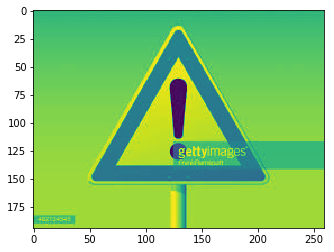

In [22]:
# Image - Caution
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image1 = []

def resize_image(img):
    resized_image = cv2.resize(img, (32,32))
    return resized_image

img = cv2.imread('Caution.jpg',0)
plt.imshow(img)
p=resize_image(img)
print ('Original Image Shape')
print (p.shape)

test_image1.append(p)
test_image1_data = np.array(test_image1)
print ('Test Image data Shape')
print (test_image1_data.shape)

test_image1_data = test_image1_data[..., newaxis]
print ('New Array Shape')
print (test_image1_data.shape)

## Show resized image
#plt.imshow(p)


with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        feed_dict={x: test_image1_data}
        prediction=tf.argmax(logits,dimension=1)
        best = sess.run([prediction],feed_dict)
        print(best)

# Caution predicted correctly as 18

Original Image Shape
(32, 32)
Test Image data Shape
(1, 32, 32)
New Array Shape
(1, 32, 32, 1)
[array([17])]


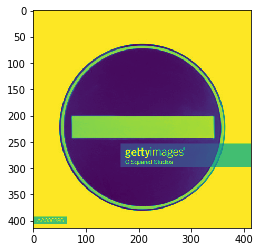

In [23]:
# image DoNotEnter


test_image2 = []

def resize_image(img):
    resized_image = cv2.resize(img, (32,32))
    return resized_image

img = cv2.imread('DoNotEnter.jpg',0)
plt.imshow(img)
p_DoNot=resize_image(img)
print ('Original Image Shape')
print (p_DoNot.shape)

test_image2.append(p_DoNot)
test_image2_data = np.array(test_image2)
print ('Test Image data Shape')
print (test_image2_data.shape)

test_image2_data = test_image2_data[..., newaxis]
print ('New Array Shape')
print (test_image2_data.shape)

## Show resized image
#plt.imshow(p)


with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        feed_dict={x: test_image2_data}
        prediction=tf.argmax(logits,dimension=1)
        best = sess.run([prediction],feed_dict)
        print(best)

# Predictly correctly as #17 from csv file

Original Image Shape
(32, 32)
Test Image data Shape
(1, 32, 32)
New Array Shape
(1, 32, 32, 1)
[array([38])]


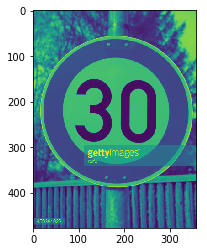

In [24]:
# Img_30 

test_image3 = []

def resize_image(img):
    resized_image = cv2.resize(img, (32,32))
    return resized_image

img = cv2.imread('Img_30.jpg',0)
plt.imshow(img)
p_Img_30=resize_image(img)
print ('Original Image Shape')
print (p_Img_30.shape)

test_image3.append(p_Img_30)
test_image3_data = np.array(test_image3)
print ('Test Image data Shape')
print (test_image3_data.shape)

test_image3_data = test_image3_data[..., newaxis]
print ('New Array Shape')
print (test_image3_data.shape)

## Show resized image
#plt.imshow(p)


with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        feed_dict={x: test_image3_data}
        prediction=tf.argmax(logits,dimension=1)
        best = sess.run([prediction],feed_dict)
        print(best)
        
# Predicted incorrectly as -  38 - Keep right

Original Image Shape
(32, 32)
Test Image data Shape
(1, 32, 32)
New Array Shape
(1, 32, 32, 1)
[array([3])]


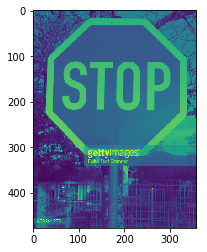

In [25]:
# Img_Stop

test_image4 = []

def resize_image(img):
    resized_image = cv2.resize(img, (32,32))
    return resized_image

img = cv2.imread('Img_Stop.jpg',0)
plt.imshow(img)
p_Img_Stop=resize_image(img)
print ('Original Image Shape')
print (p_Img_Stop.shape)

test_image4.append(p_Img_Stop)
test_image4_data = np.array(test_image4)
print ('Test Image data Shape')
print (test_image4_data.shape)

test_image4_data = test_image4_data[..., newaxis]
print ('New Array Shape')
print (test_image4_data.shape)

## Show resized image
#plt.imshow(p)


with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        feed_dict={x: test_image4_data}
        prediction=tf.argmax(logits,dimension=1)
        best = sess.run([prediction],feed_dict)
        print(best)

# Predicted incorrectly as - Speed limit (60km/h) (3)

Original Image Shape
(32, 32)
Test Image data Shape
(1, 32, 32)
New Array Shape
(1, 32, 32, 1)
[array([23])]


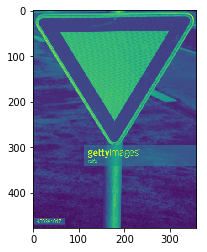

In [26]:
# Img_Triangle - the yield sign

test_image5 = []

def resize_image(img):
    resized_image = cv2.resize(img, (32,32))
    return resized_image

img = cv2.imread('Img_Triangle.jpg',0)
plt.imshow(img)
p_Img_T=resize_image(img)
print ('Original Image Shape')
print (p_Img_T.shape)

test_image5.append(p_Img_T)
test_image5_data = np.array(test_image5)
print ('Test Image data Shape')
print (test_image5_data.shape)

test_image5_data = test_image5_data[..., newaxis]
print ('New Array Shape')
print (test_image5_data.shape)

## Show resized image
#plt.imshow(p)


with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        feed_dict={x: test_image5_data}
        prediction=tf.argmax(logits,dimension=1)
        best = sess.run([prediction],feed_dict)
        print(best)
        
# predicted incorrectly as Slippery road (23) 

In [32]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

Result = 100*(2/5) 
print (str(Result)+"%")

40.0%


### Predict the Sign Type for Each Image

### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [27]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.


# Image - Caution , test_image1_data

with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        feed_dict={x: test_image1_data.astype(np.float64)}
        logits=logits        
        softmax = sess.run([logits],feed_dict)
        print (softmax)
        
with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        feed_dict={x: test_image1_data}
        top_k=tf.nn.top_k(logits, k=5, sorted=True, name=None)  
        top_k = sess.run([top_k],feed_dict)
        print (top_k)

[array([[-12328.00488281,   -546.00085449,  -3067.078125  , -16520.68554688,
         -6412.21777344,  -2575.62158203, -11211.9765625 ,  -6684.73974609,
        -18971.58398438, -29146.99023438, -13534.44335938,   -427.77050781,
        -14595.20605469, -24225.54296875, -12062.81445312, -13543.49609375,
        -28398.87304688, -32397.75390625,  17305.828125  , -20032.19921875,
         -8892.47558594,  -9256.92382812, -12947.17578125, -18734.04296875,
         -2620.07226562,   2484.12841797,  -3067.66064453,  -1902.20458984,
        -13429.80273438,  -6385.57470703, -11724.77441406,  -5406.89208984,
        -25530.72851562, -23521.08398438, -36290.07421875, -24880.58007812,
        -30016.06835938,  -5549.14648438,   2632.43164062,  -5978.69287109,
         -7868.55029297, -33504.1328125 , -23864.56640625]], dtype=float32)]
[TopKV2(values=array([[ 17305.828125  ,   2632.43164062,   2484.12841797,   -427.77050781,
          -546.00085449]], dtype=float32), indices=array([[18, 38, 25, 

In [28]:
# image DoNotEnter , test_image2_data

with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        feed_dict={x: test_image2_data.astype(np.float64)}
        logits=logits        
        softmax = sess.run([logits],feed_dict)
        print (softmax)
        
with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        feed_dict={x: test_image2_data}
        top_k=tf.nn.top_k(logits, k=5, sorted=True, name=None)  
        top_k = sess.run([top_k],feed_dict)
        print (top_k)
        


[array([[  3596.79418945, -14511.02148438, -30147.65039062, -17070.12695312,
        -31068.1015625 , -43991.12109375, -52387.91015625, -71644.2734375 ,
        -24563.56445312,  10030.38183594,  -7212.65136719, -37196.59765625,
         -7807.22314453, -36543.5390625 ,    410.52380371, -25691.62304688,
        -58008.7890625 ,  35403.30078125, -38447.765625  , -25734.02734375,
        -22754.9921875 , -39346.359375  , -30579.07421875,  -2901.83203125,
        -59067.2890625 , -63227.01171875,  -6090.07275391, -92867.140625  ,
        -20098.90039062, -13832.29589844, -21566.0859375 , -43367.31640625,
        -37281.265625  , -24165.84570312,  -9075.08691406,  -4221.13085938,
        -12489.15625   ,    991.40142822, -19020.203125  , -56037.7109375 ,
          3347.59375   , -21428.890625  , -69928.4609375 ]], dtype=float32)]
[TopKV2(values=array([[ 35403.30078125,  10030.38183594,   3596.79418945,   3347.59375   ,
           991.40142822]], dtype=float32), indices=array([[17,  9,  0, 

In [29]:
# Img_30 , test_image3_data

with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        feed_dict={x: test_image3_data.astype(np.float64)}
        logits=logits        
        softmax = sess.run([logits],feed_dict)
        print (softmax)
        
with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        feed_dict={x: test_image3_data}
        top_k=tf.nn.top_k(logits, k=5, sorted=True, name=None)  
        top_k = sess.run([top_k],feed_dict)
        print (top_k)
        


[array([[ -5572.90429688,  -1699.82763672,  -1090.90612793,  -7240.55371094,
        -13995.45898438,  -3332.20068359,  -4336.90136719, -14170.89355469,
        -17392.83007812, -12864.82519531,   -613.33380127,  -6151.203125  ,
         -9621.57910156,   -233.66937256,  -1548.56079102, -12890.36425781,
        -14970.72363281, -10910.19726562,  -8578.27441406,  -8100.28613281,
        -14773.83886719,  -2742.22973633, -11674.1171875 ,  -3089.26904297,
         -8201.00292969,  -9123.97070312, -10498.71289062, -14246.73144531,
         -6393.43896484,  -3777.80737305,  -7283.26367188,  -8188.10986328,
        -22147.81835938, -11438.9140625 , -11042.05078125,  -3536.86889648,
        -11317.75195312,  -6920.30078125,    558.97625732,  -9269.125     ,
         -7210.30908203, -17123.88085938,  -7821.32763672]], dtype=float32)]
[TopKV2(values=array([[  558.97625732,  -233.66937256,  -613.33380127, -1090.90612793,
        -1548.56079102]], dtype=float32), indices=array([[38, 13, 10,  2, 1

In [30]:
# # Img_Stop, test_image4_data

with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        feed_dict={x: test_image4_data.astype(np.float64)}
        logits=logits        
        softmax = sess.run([logits],feed_dict)
        print (softmax)
        
with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        feed_dict={x: test_image4_data}
        top_k=tf.nn.top_k(logits, k=5, sorted=True, name=None)  
        top_k = sess.run([top_k],feed_dict)
        print (top_k)
        


[array([[-37478.54296875, -14059.73242188,  -3984.8125    ,   7857.65039062,
        -37988.06640625,  -5987.39892578, -15108.57910156, -17686.6953125 ,
        -28710.19921875,   3016.63598633,   -656.97210693,  -1696.94030762,
         -1812.94421387,   3090.96972656,  -7975.94433594, -12744.03027344,
        -12094.33984375,  -9156.63769531, -24962.5390625 , -10124.40039062,
        -15186.46191406, -11451.31152344, -28095.62109375,   -386.33718872,
        -27766.85546875, -15423.20800781, -16467.88671875, -17265.07226562,
          2097.99194336, -14508.72070312, -11163.61816406, -15686.66894531,
        -14845.54101562, -12887.359375  , -10218.40820312,   3630.94946289,
        -21101.80273438, -13124.234375  ,  -4186.99658203, -21713.57421875,
         -6823.20654297,  -7337.95800781,  -7324.51025391]], dtype=float32)]
[TopKV2(values=array([[ 7857.65039062,  3630.94946289,  3090.96972656,  3016.63598633,
         2097.99194336]], dtype=float32), indices=array([[ 3, 35, 13,  9, 2

In [31]:
# Img_Triangle , test_image5_data

with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        feed_dict={x: test_image5_data.astype(np.float64)}
        logits=logits        
        softmax = sess.run([logits],feed_dict)
        print (softmax)
        
with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        feed_dict={x: test_image5_data}
        top_k=tf.nn.top_k(logits, k=5, sorted=True, name=None)  
        top_k = sess.run([top_k],feed_dict)
        print (top_k)
        
     

[array([[-23967.04101562, -11022.13769531, -14533.72167969,   -957.7520752 ,
        -35712.46484375,  -4736.99853516,   -738.9432373 , -15621.37011719,
        -23035.74023438,  -2028.86010742,  -6996.05029297,  -3903.42236328,
         -9329.15136719,  -4304.42871094, -24460.49414062, -20123.40429688,
         -4954.04736328, -18819.51953125, -19681.8515625 ,  -6878.91943359,
          2553.94824219, -12755.3828125 , -18955.625     ,   3327.87963867,
        -11256.43847656,  -8627.58789062, -10778.28222656, -17838.72460938,
          1083.94287109,  -5246.13378906,   -700.05059814, -18168.10546875,
         -8020.97802734, -20445.70898438,   -505.62252808,   2838.98608398,
           718.98565674, -18510.55078125,  -1167.09680176, -37924.1015625 ,
        -18269.625     ,    549.60986328,  -1534.91503906]], dtype=float32)]
[TopKV2(values=array([[ 3327.87963867,  2838.98608398,  2553.94824219,  1083.94287109,
          718.98565674]], dtype=float32), indices=array([[23, 35, 20, 28, 3

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 